In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf
from scipy.signal import find_peaks

In [2]:
data_src = r"D:\Data\both 800fps\brightfield\*tif"

In [3]:
data = OG.SequenceManager.load_tif(data_src)

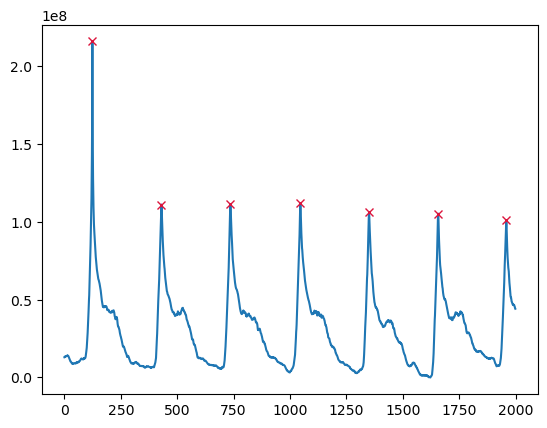

In [4]:
diffs = jps.sad_with_references(data[125], data[1::])
diffs = -diffs
diffs -= np.min(diffs)
plt.plot(diffs)
# Get peaks
peaks, _ = find_peaks(diffs, height = 1e8, width = 5)
plt.plot(peaks, diffs[peaks], "x", c = "crimson")
plt.show()

In [5]:
reference_indices = []
reference_periods = []

for i in range(1, len(peaks) - 2):
    first_subframe = OG.v_fitting(-diffs[peaks[i] - 1], -diffs[peaks[i]], -diffs[peaks[i] + 1])
    last_subframe = OG.v_fitting(-diffs[peaks[i + 1] - 1], -diffs[peaks[i + 1]], -diffs[peaks[i + 1] + 1])

    reference_indices.append((peaks[i] - 2, peaks[i + 1] + 2))
    reference_periods.append((peaks[i + 1] + last_subframe[0]) - (peaks[i] + first_subframe[0]))


In [6]:
oog_ref1 = OG.BasicOpticalGating()
oog_ref1.sequence_manager.set_source(data_src)
oog_ref1.sequence_manager.set_reference_sequence_by_indices(reference_indices[0])
oog_ref1.sequence_manager.reference_period = reference_periods[0]
oog_ref1.run()

oog_ref2 = OG.BasicOpticalGating()
oog_ref2.sequence_manager.set_source(data_src)
oog_ref2.sequence_manager.set_reference_sequence_by_indices(reference_indices[1])
oog_ref2.sequence_manager.reference_period = reference_periods[1]
oog_ref2.run()

oog_ref3 = OG.BasicOpticalGating()
oog_ref3.sequence_manager.set_source(data_src)
oog_ref3.sequence_manager.set_reference_sequence_by_indices(reference_indices[2])
oog_ref3.sequence_manager.reference_period = reference_periods[2]
oog_ref3.run()

oog_ref4 = OG.BasicOpticalGating()
oog_ref4.sequence_manager.set_source(data_src)
oog_ref4.sequence_manager.set_reference_sequence_by_indices(reference_indices[3])
oog_ref4.sequence_manager.reference_period = reference_periods[3]
oog_ref4.run()

Setting source to D:\Data\both 800fps\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\both 800fps\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\both 800fps\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\both 800fps\brightfield\*tif
Getting SADs
Getting phases


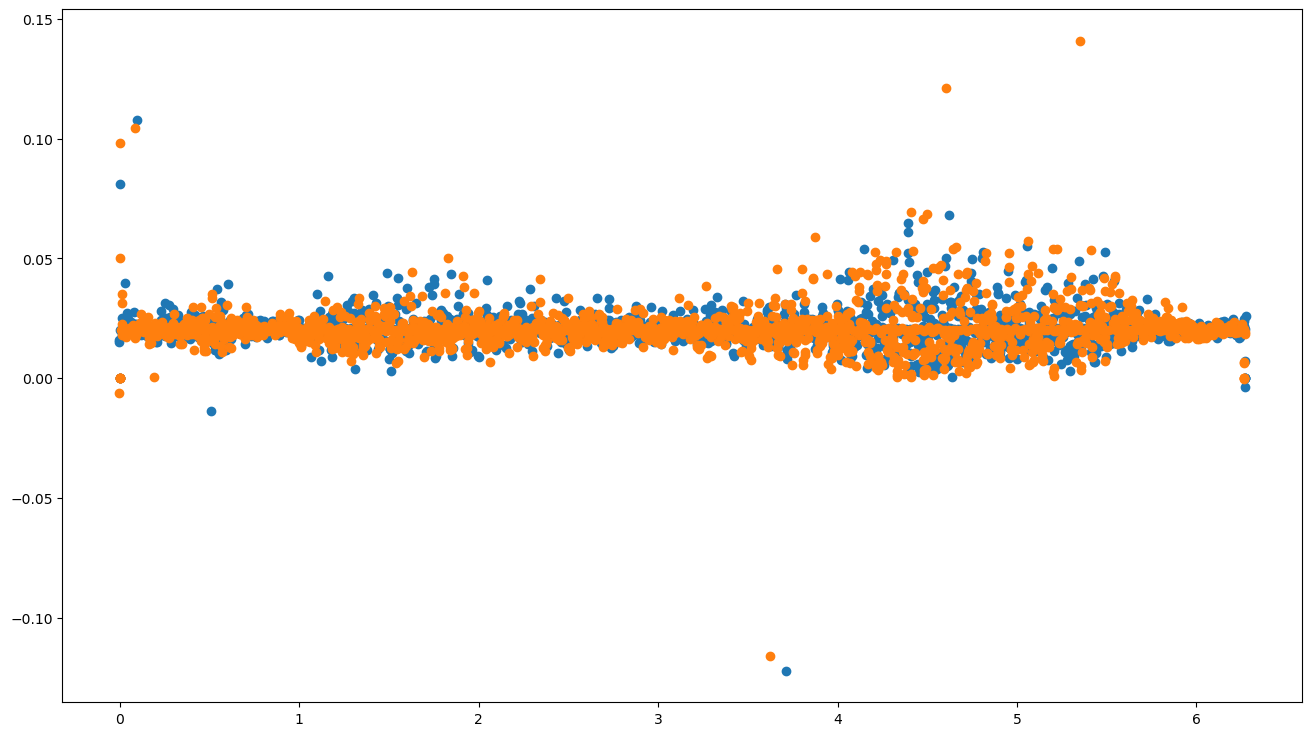

In [7]:
plt.figure(figsize = (16,9))
plt.scatter(oog_ref1.phases[1::], oog_ref1.delta_phases)
plt.scatter(oog_ref2.phases[1::], oog_ref2.delta_phases)
plt.show()

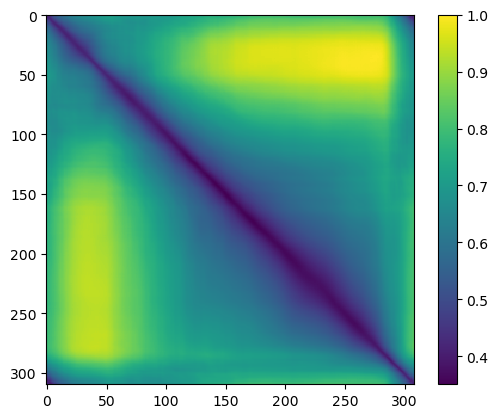

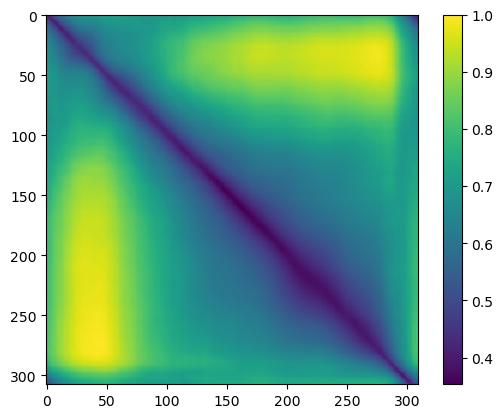

In [8]:
ref_sim_plot13 = []
for i in range(oog_ref1.sequence_manager.reference_sequence.shape[0]):
    ref_sim_plot13.append(jps.sad_with_references(oog_ref1.sequence_manager.reference_sequence[i], oog_ref3.sequence_manager.reference_sequence))

ref_sim_plot24 = []
for i in range(oog_ref3.sequence_manager.reference_sequence.shape[0]):
    ref_sim_plot24.append(jps.sad_with_references(oog_ref2.sequence_manager.reference_sequence[i], oog_ref4.sequence_manager.reference_sequence))


ref_sim_plot13 = np.array(ref_sim_plot13).astype(np.float32)
ref_sim_plot13 = ref_sim_plot13 / np.max(ref_sim_plot13)
ref_sim_plot24 = np.array(ref_sim_plot24).astype(np.float32)
ref_sim_plot24 = ref_sim_plot24 / np.max(ref_sim_plot24)

plt.imshow(ref_sim_plot13, interpolation = "none")
plt.colorbar()
plt.show()
plt.imshow(ref_sim_plot24, interpolation = "none")
plt.colorbar()
plt.show()

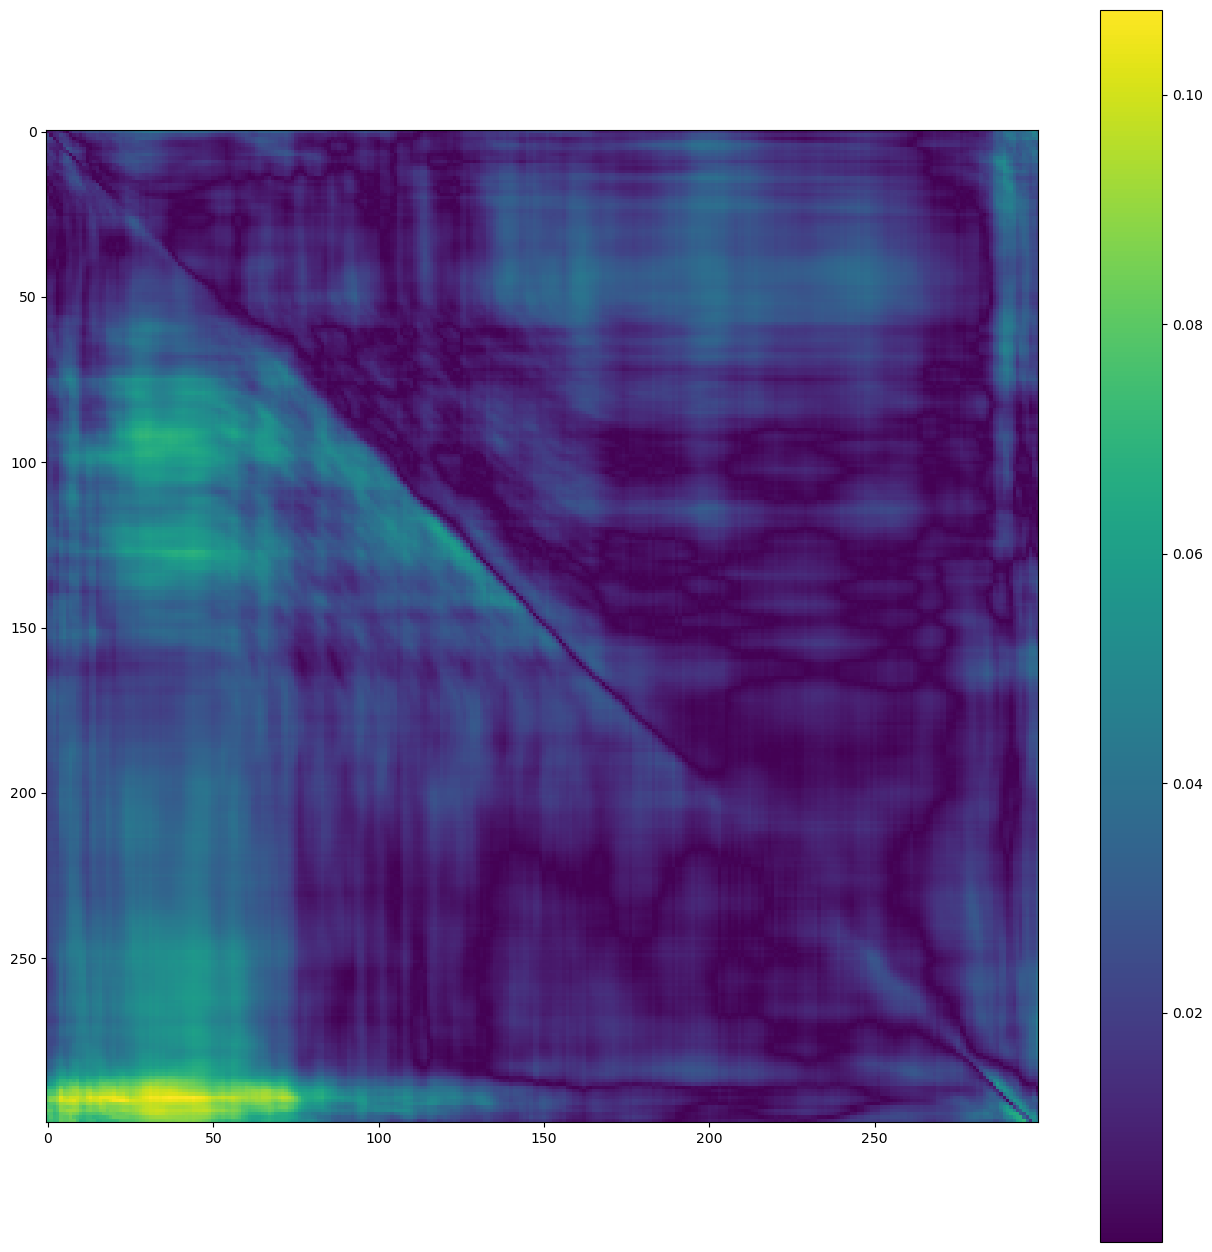

In [9]:
plt.figure(figsize = (16,16))
plt.imshow(np.abs(np.array(ref_sim_plot13)[0:300,0:300] - np.array(ref_sim_plot24)[0:300,0:300]))
plt.colorbar()
plt.show()

In [10]:
print(oog_ref1.unwrapped_phases)
print(oog_ref2.unwrapped_phases)

[ 0.         -0.12208291 -0.10539982 ... 40.92400901 40.94283148
 40.96164034]
[ 0.         -0.11605978 -0.08605988 ... 41.00401029 41.02233317
 41.0402924 ]


[1.00005911 0.04200321]


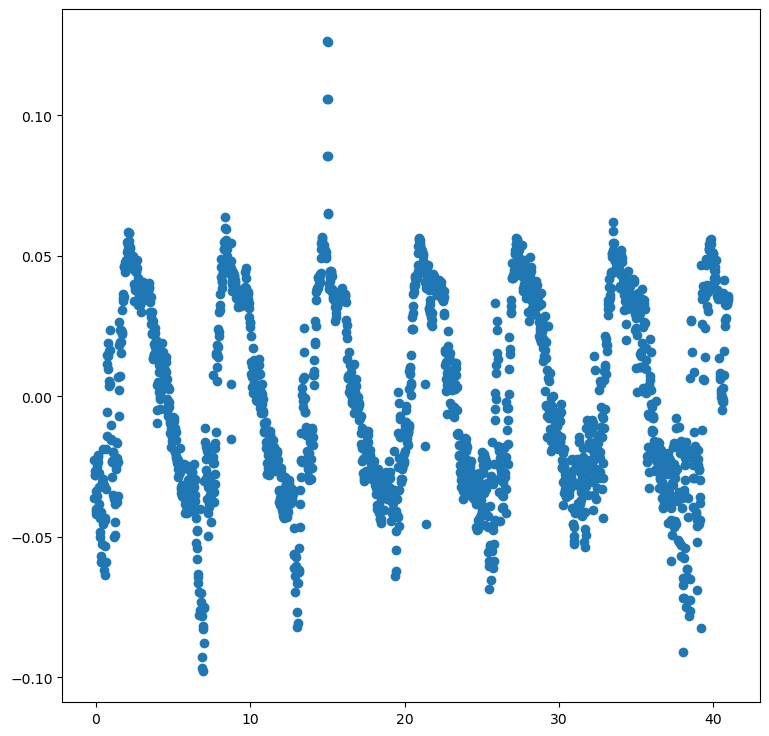

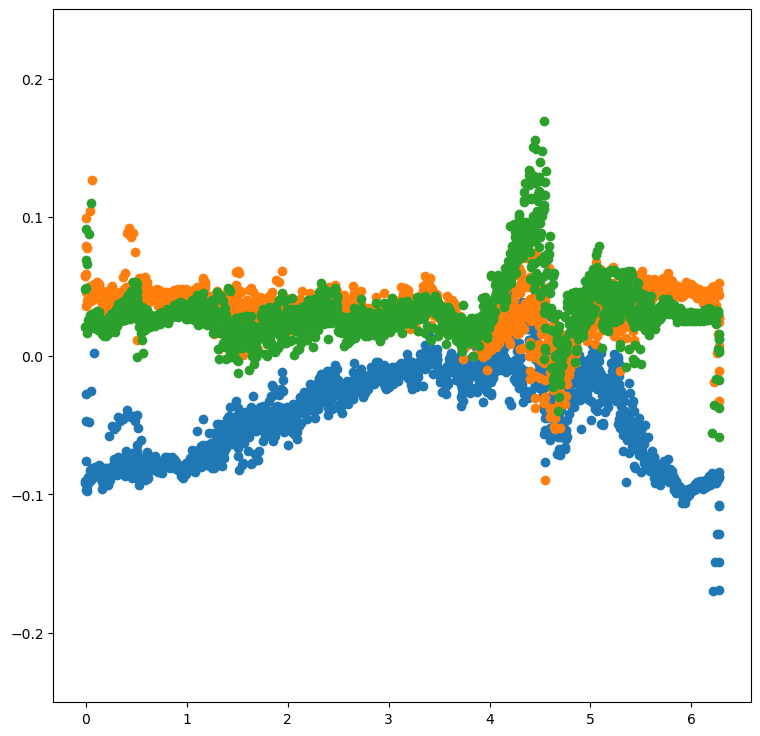

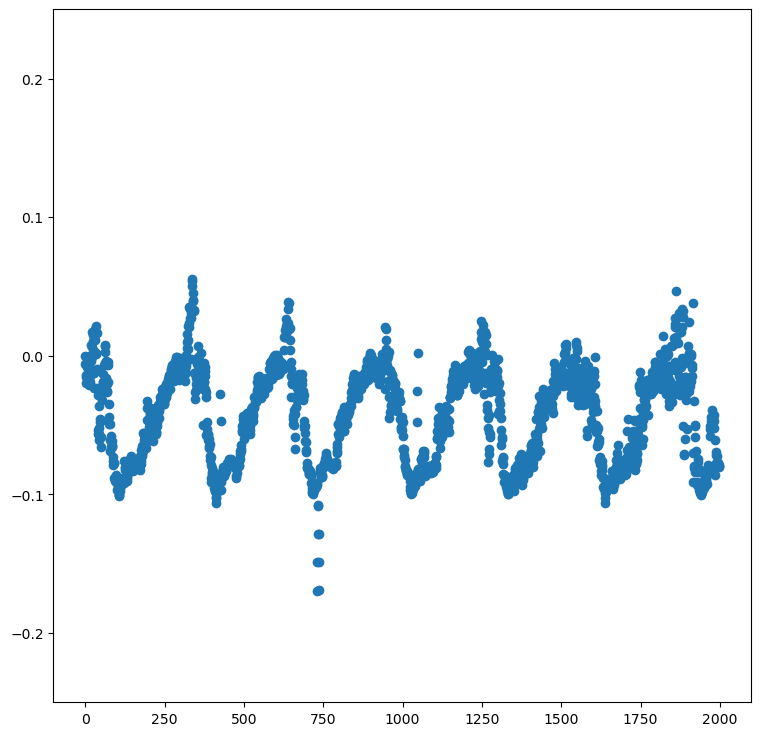

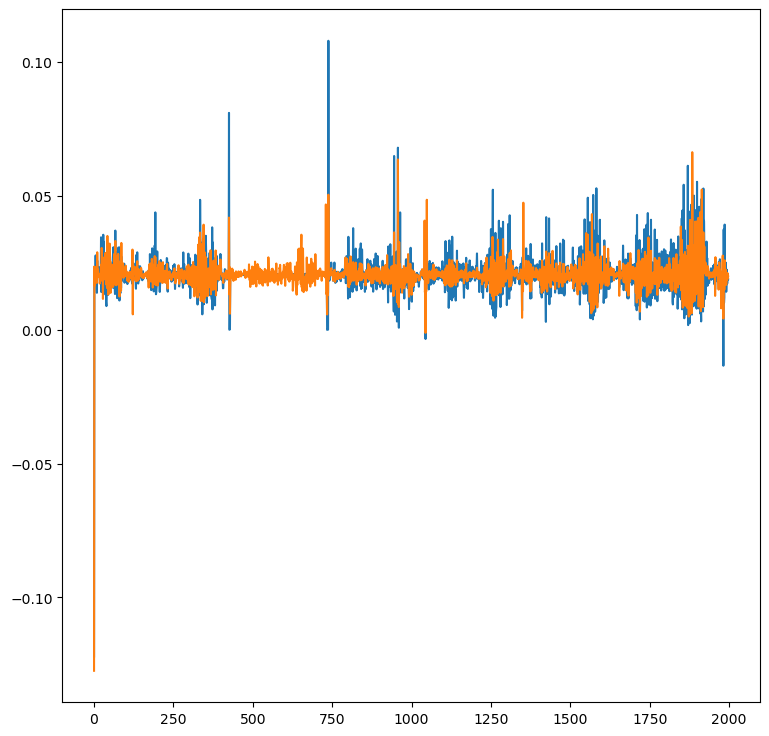

In [11]:
plt.figure(figsize = (9,9))
# Detrend using line of best fit
fit = np.polyfit(oog_ref1.unwrapped_phases, oog_ref2.unwrapped_phases, 1)
print(fit)
plt.scatter(oog_ref1.unwrapped_phases, oog_ref2.unwrapped_phases - np.polyval(fit, oog_ref1.unwrapped_phases))
#plt.scatter(oog_ref1.unwrapped_phases, oog_ref2.unwrapped_phases)
plt.show()

plt.figure(figsize = (9,9))
plt.scatter(oog_ref1.phases, (oog_ref1.unwrapped_phases - oog_ref2.unwrapped_phases))
plt.ylim(-0.25,0.25)
"""plt.show()

plt.figure(figsize = (9,9))"""
plt.scatter(oog_ref1.phases, (oog_ref1.unwrapped_phases - oog_ref3.unwrapped_phases))
plt.ylim(-0.25,0.25)
"""plt.show()

plt.figure(figsize = (9,9))"""
plt.scatter(oog_ref1.phases, (oog_ref1.unwrapped_phases - oog_ref4.unwrapped_phases))
plt.ylim(-0.25,0.25)
plt.show()

plt.figure(figsize = (9,9))
plt.scatter(range(len(oog_ref1.phases)), (oog_ref1.unwrapped_phases - oog_ref2.unwrapped_phases))
plt.ylim(-0.25,0.25)
plt.show()

plt.figure(figsize = (9,9))
plt.plot(np.diff(oog_ref1.unwrapped_phases))
plt.plot(np.diff(np.mean([oog_ref1.unwrapped_phases, oog_ref2.unwrapped_phases, oog_ref3.unwrapped_phases], axis = 0)))

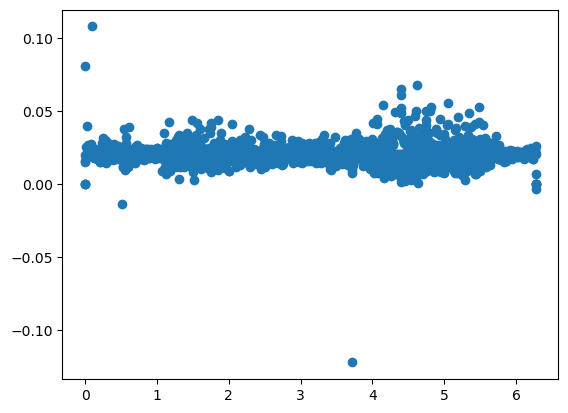

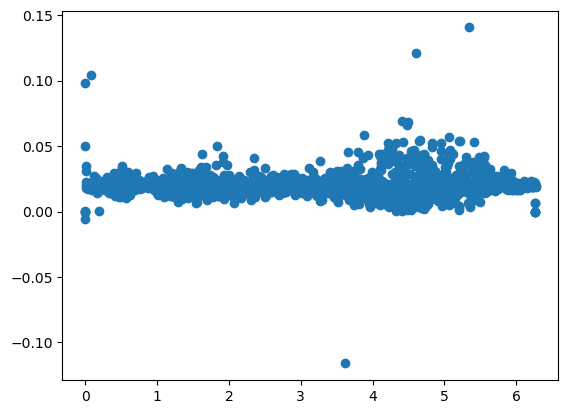

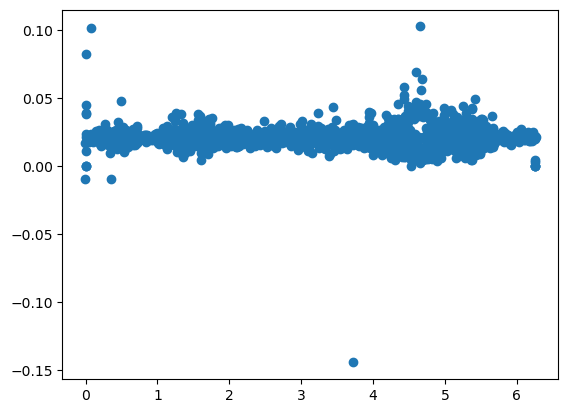

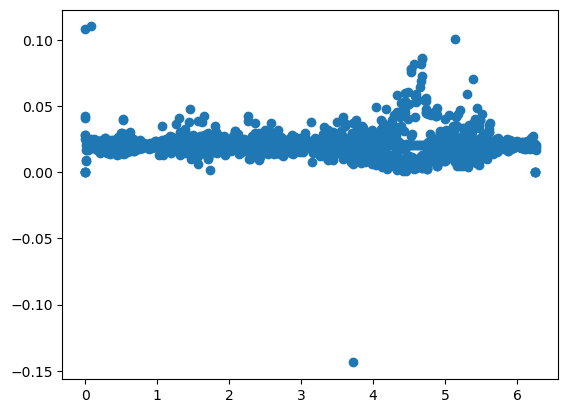

In [12]:
plt.scatter(oog_ref1.phases[1::], oog_ref1.delta_phases)
plt.show()
plt.scatter(oog_ref2.phases[1::], oog_ref2.delta_phases)
plt.show()
plt.scatter(oog_ref3.phases[1::], oog_ref3.delta_phases)
plt.show()
plt.scatter(oog_ref4.phases[1::], oog_ref4.delta_phases)
plt.show()